# OptimizerMethod-Optimizer(Application)

为了保证本节代码的整洁,我将其余的代码全部放入```utils.py```文件中

In [1]:
import numpy as np
from sklearn import datasets
from utils import *
import matplotlib.pyplot as plt

### Load Data

我们使用scikit-learn中的datasets库里面的"moon"

In [2]:
def load_dataset(n_sample):
    """
    Load data set.
    Argument:
    --------
        n_sample: number of sample.
    Returns:
    -------
        X: training data.
        y: training labels,the shape os (n_sample,1)
    """
    np.random.seed(3)
    X, y = datasets.make_moons(n_samples=n_sample, noise=.15) #300 #0.2 
    # Visualize the data
    plt.scatter(X[:, 0], X[:, 1], c=y, s=5, cmap=plt.cm.Spectral);
    
    
    return X,y.reshape(-1,1)

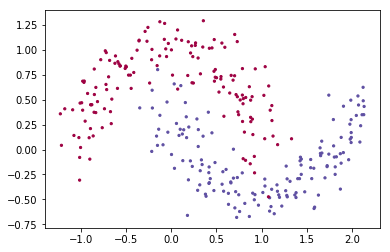

In [3]:
train_x,train_y = load_dataset(300)

### SGD

首先我们使用SGD Optimizer进行训练,下面是SGD对应的代码

In [4]:
def init_parameters_SGD(L,layers):
    """
    Initialization Parameters include weights and bias.

    Returns:
    -------
        parameters: include weights and bias.
    """
    np.random.seed(4)
    parameters = {}
    for l in range(L-1):
        W = np.random.randn(layers[l],layers[l+1]) * np.sqrt(2/layers[l])
        b = np.zeros((1,layers[l+1]))
        parameters['W'+str(l+1)] = W
        parameters['b'+str(l+1)] = b
    return parameters

In [5]:
def update_SGD(L,alpha,dparameters,parameters):
        """
        Updating parameters
        Arguments:
        ---------
            dparameters: Derivative weights and derivative bias in backward.
            parameters: include weights and bias.
        
        Return:
        ------
            parameters: updated weights and bias.
        """
        for l in range(L-1):
            parameters['W'+str(l+1)] -= alpha * dparameters['dW'+str(l+1)]
            parameters['b'+str(l+1)] -= alpha * dparameters['db'+str(l+1)]
            
        return parameters

### Momentum 

<img width=500 height=500 src="../../picture/95.png" />

这里采取不带偏差修正的Momentum,我们使用Tensorflow/Pytorch一样的形式:

$v=\rho * v + g$

$\theta = \theta - lr * v$

$\beta=0.9$

In [6]:
def init_parameters_Momentum(L,layers):
    """
    Initialization Parameters include weights and bias of Momentum.
    
    Arguments:
    ---------
        L: Number of NN layers
        layers: hidden layer's units + input layer units.

    Returns:
    -------
        parameters: include weights and bias.
        v: momentum parameters include weights and bias,initialization zeros.
    """
    np.random.seed(4)
    parameters = {}
    v = {}
    for l in range(L-1):
        W = np.random.randn(layers[l],layers[l+1]) * np.sqrt(2/layers[l])
        b = np.zeros((1,layers[l+1]))
        parameters['W'+str(l+1)] = W
        parameters['b'+str(l+1)] = b
        
        v['v_dW'+str(l+1)] = np.zeros((W.shape[0],W.shape[1]))
        v['v_db'+str(l+1)] = np.zeros((b.shape[0],b.shape[1]))
        
    return parameters,v

In [7]:
def update_Momentum(L,alpha,beta_momentum,v,dparameters,parameters):
        """
        Updating parameters of Momentum
        Arguments:
        ---------
            L: Number of NN layers.
            alpha: Learning rate.
            beta_momentum: momentum parameter decay, usually equal 0.9
            v:momentum parameters include weights and bias.
            dparameters: Derivative weights and derivative bias in backward.
            parameters: include weights and bias.
        
        Return:
        ------
            parameters: updated weights and bias.
        """
        for l in range(L-1):
            v['v_dW'+str(l+1)] = beta_momentum * v['v_dW'+str(l+1)] +  dparameters['dW'+str(l+1)]
            v['v_db'+str(l+1)] = beta_momentum * v['v_db'+str(l+1)] +  dparameters['db'+str(l+1)]
            
            parameters['W'+str(l+1)] -= alpha * v['v_dW'+str(l+1)]
            parameters['b'+str(l+1)] -= alpha * v['v_db'+str(l+1)]
            
        return parameters,v

### Nesterov Accelerated Gradient

<img width=500 height=500 src="../../picture/94.png" />

由于采用原算法,速度会特别慢,所以我们这里使用衍生版本即:

$V_{t+1} = \beta V_{t} -\alpha g$

$\theta_{t+1}=\theta_{t}+\beta V_{t+1}-\alpha g$

$\beta=0.9$

In [8]:
def init_parameters_NGA(L,layers):
    """
    Initialization Parameters include weights and bias of NAG.
    
    Arguments:
    ---------
        L: Number of NN layers
        layers: hidden layer's units + input layer units.

    Returns:
    -------
        parameters: include weights and bias.
        v: momentum parameters include weights and bias,initialization zeros.
    """
    
    np.random.seed(4)
    parameters = {}
    v = {}
    for l in range(L-1):
        W = np.random.randn(layers[l],layers[l+1]) * np.sqrt(2/layers[l])
        b = np.zeros((1,layers[l+1]))
        parameters['W'+str(l+1)] = W
        parameters['b'+str(l+1)] = b
        
        v['v_dW'+str(l+1)] = np.zeros((W.shape[0],W.shape[1]))
        v['v_db'+str(l+1)] = np.zeros((b.shape[0],b.shape[1]))
        
    return parameters,v

In [9]:
def update_NGA(L,beta_NGA,alpha,v,dparameters,parameters):
    """
        Updating parameters of NAG
        Arguments:
        ---------
            L: Number of NN layers.
            alpha: Learning rate.
            beta_NGA: NAG parameter decay, usually equal 0.9
            v:NAG parameters include weights and bias.
            dparameters: Derivative weights and derivative bias in backward.
            parameters: include weights and bias.
        
        Return:
        ------
            parameters: updated weights and bias.
        """
    
    for l in range(L-1):
        v['v_dW' + str(l+1)] = beta_NGA * v['v_dW'+str(l+1)] - alpha * dparameters['dW'+str(l+1)]
        v['v_db' + str(l+1)] = beta_NGA * v['v_db'+str(l+1)] - alpha * dparameters['db'+str(l+1)]
        
        parameters['W'+str(l+1)] += beta_NGA * v['v_dW'+str(l+1)] - alpha * dparameters['dW'+str(l+1)]
        parameters['b'+str(l+1)] += beta_NGA * v['v_db'+str(l+1)] - alpha * dparameters['db'+str(l+1)]
        
    return parameters,v
    

### Adagrad

<img width=500 height=500 src="../../picture/93.png" />

$G_{\theta}=G_{\theta}+(g)^2$

$\theta = \theta - \frac{\alpha}{\sqrt{G_{\theta}}+\epsilon}\cdot g$

In [10]:
def init_parameters_Adagrad(L,layers):
    """
    Initialization Parameters include weights and bias of Adagrad.
    
    Arguments:
    ---------
        L: Number of NN layers
        layers: hidden layer's units + input layer units.

    Returns:
    -------
        parameters: include weights and bias.
        G: Adagrad parameters include weights and bias,initialization zeros.
    """
    
    np.random.seed(4)
    parameters = {}
    G = {}
    for l in range(L-1):
        W = np.random.randn(layers[l],layers[l+1]) * np.sqrt(2/layers[l])
        b = np.zeros((1,layers[l+1]))
        parameters['W'+str(l+1)] = W
        parameters['b'+str(l+1)] = b
        
        G['W'+str(l+1)] = np.zeros((W.shape[0],W.shape[1]))
        G['b'+str(l+1)] = np.zeros((b.shape[0],b.shape[1]))
        
    return parameters,G

In [11]:
def update_Adagrad(L,G,dparameters,parameters,alpha,epsilon):
    """
        Updating parameters of Adagrad
        Arguments:
        ---------
            L: Number of NN layers.
            G:  Adagrad parameters include weights and bias.
            alpha: Learning rate.
            dparameters: Derivative weights and derivative bias in backward.
            parameters: include weights and bias.
            epsilon: minimum value,usually equal 1e−8.
        
        Return:
        ------
            parameters: updated weights and bias.
            G: update G include parameters.
        """
    
    for l in range(L-1):
        G['W'+str(l+1)] = G['W'+str(l+1)] + np.square(dparameters['dW'+str(l+1)])
        G['b'+str(l+1)] = G['b'+str(l+1)] + np.square(dparameters['db'+str(l+1)])
        
        parameters['W'+str(l+1)] -= alpha / (np.sqrt(G['W'+str(l+1)])+epsilon) * dparameters['dW'+str(l+1)]
        parameters['b'+str(l+1)] -= alpha / (np.sqrt(G['b'+str(l+1)])+epsilon) * dparameters['db'+str(l+1)]
        
    return parameters,G

### Adadelta

<img width=500 height=500 src="../../picture/109.png" />

$S_{dw}=\rho S_{dw} +(1-\rho)({dw})^{2}$

$S_{db}=\rho S_{db} +(1-\rho)({db})^{2}$

$V_{dw}=\frac{\sqrt{\triangledown_{w}+\epsilon}}{\sqrt{S_{dw}+\epsilon}}\cdot dw$

$V_{db}=\frac{\sqrt{\triangledown_{b}+\epsilon}}{\sqrt{S_{db}+\epsilon}}\cdot db$

$w=w-lr*V_{dw}$

$b = b -lr*V_{db}$

$\triangledown_{w} = \rho \triangledown_{w} + (1-\rho)(V_{dw})^{2}$

$\triangledown_{b} = \rho \triangledown_{b} + (1-\rho)(V_{db})^{2}$

其中这里的$lr$是可以乘(Keras)也可以不乘(原文),这里选择不使用学习率

$\epsilon$通常取$10^{-6}$

$\rho=0.9$

In [12]:
def init_parameters_Adadelta(L,layers):
    """
    Initialization Parameters include weights and bias of Adadelta.
    
    Arguments:
    ---------
        L: Number of NN layers
        layers: hidden layer's units + input layer units.

    Returns:
    -------
        parameters: include weights and bias.
        S: mean square S, include weights and bias.
        V: mean square delta x,include weights and bias.
        delta: deta x.
    """
    
    np.random.seed(4)
    parameters = {}
    S = {}
    V = {}
    delta = {}
    for l in range(L-1):
        W = np.random.randn(layers[l],layers[l+1]) * np.sqrt(2/layers[l])
        b = np.zeros((1,layers[l+1]))
        parameters['W'+str(l+1)] = W
        parameters['b'+str(l+1)] = b
        
        S['S_dW'+str(l+1)] = np.zeros((W.shape[0],W.shape[1]))
        S['S_db'+str(l+1)] = np.zeros((b.shape[0],b.shape[1]))
        V['V_dW'+str(l+1)] = np.zeros(W.shape)
        V['V_db'+str(l+1)] = np.zeros(b.shape)
        delta['W'+str(l+1)] = np.zeros(W.shape)
        delta['b'+str(l+1)] = np.zeros(b.shape)
        
    return parameters,S,V,delta

In [13]:
def update_Adadelta(L,S,V,delta,beta_Adadelta,dparameters,parameters,epsilon):
    """
    Updating parameters
    
    Arguments:
    ---------
        L: Number of NN layers
        S: mean square.
        V: mean square delta x.
        delta: delta x, include weights and bias.
        beta_Adadelta: Adadelta decay,usually euqal 0.9.
        dparameters: Derivative weights and derivative bias in backward.
        parameters:include weights and bias.
        epsilon: minimun value usually euqal 1e-6.
    
    Returns:
    -------
        parameters: updated weights and bias.
        S: mean square.
        V: mean square delta x (W,b).
        delta: delta x, include weights and bias.
    
    """
    for l in range(L-1):
        S['S_dW'+str(l+1)] = beta_Adadelta * S['S_dW'+str(l+1)] + (1-beta_Adadelta) * np.square(dparameters['dW'+str(l+1)])
        S['S_db'+str(l+1)] = beta_Adadelta * S['S_db'+str(l+1)] + (1-beta_Adadelta) * np.square(dparameters['db'+str(l+1)])
        
        V['V_dW'+str(l+1)] = np.sqrt(delta['W'+str(l+1)]+epsilon) /np.sqrt(S['S_dW'+str(l+1)]+epsilon) * dparameters['dW'+str(l+1)]
        V['V_db'+str(l+1)] = np.sqrt(delta['b'+str(l+1)]+epsilon) /np.sqrt(S['S_db'+str(l+1)]+epsilon) * dparameters['db'+str(l+1)]
        
        parameters['W'+str(l+1)] -= V['V_dW'+str(l+1)]
        parameters['b'+str(l+1)] -= V['V_db'+str(l+1)]
        
        delta['W'+str(l+1)] = beta_Adadelta * delta['W'+str(l+1)] + (1-beta_Adadelta)*np.square(V['V_dW'+str(l+1)])
        delta['b'+str(l+1)] = beta_Adadelta * delta['b'+str(l+1)] + (1-beta_Adadelta)*np.square(V['V_db'+str(l+1)])
        
    
    return parameters,S,V,delta

### RMSProp

<img width=500 height=500 src="../../picture/96.png" />

$S_{dW}=\beta S_{dW} + (1-\beta)({dW})^2$

$S_{db}=\beta S_{db} + (1-\beta)({db})^2$

$W = W -\alpha \frac{dW}{\sqrt{S_{dW}+\epsilon}}$

$b = b -\alpha \frac{db}{\sqrt{S_{db}+\epsilon}}$

Hinton建议Learning rate:$0.001$,momentum:$\beta=0.9$,而且我们的$\epsilon$可以取值为$10^{-6}$

In [14]:
def init_parameters_RMSProp(L,layers):
    """
    Initialization Parameters include weights and bias of RMSProp.
    
    Arguments:
    ---------
        L: Number of NN layers
        layers: hidden layer's units + input layer units.

    Returns:
    -------
        parameters: include weights and bias.
        S: mean square S, include weights and bias.
    """
    
    np.random.seed(4)
    parameters = {}
    S = {}
    for l in range(L-1):
        W = np.random.randn(layers[l],layers[l+1]) * np.sqrt(2/layers[l])
        b = np.zeros((1,layers[l+1]))
        parameters['W'+str(l+1)] = W
        parameters['b'+str(l+1)] = b
        
        S['S_dW'+str(l+1)] = np.zeros(W.shape)
        S['S_db'+str(l+1)] = np.zeros(b.shape)
        
    return parameters,S

In [15]:
def update_RMSProp(L,beta_RMSProp,dparameters,parameters,S,alpha,epsilon):
    """
    updating parameters of RMSProp.
    
    Arguments:
    ---------
        L: Number of NN layers
        beta_RMSProp: RMSProp decay, usually euqal 0.9.
        dparameters: Derivative weights and derivative bias in backward.
        parameters: weights and bias.
        S: means square weights and bias.
        alpha: learning rate usually equal 0.001.
        epsilon: minimum value euqal 1e-6
    
    Returns:
    -------
        parameters: have weights and bias.
        S: mean square weights and bias.
    """
    
    for l in range(L-1):
        S['S_dW'+str(l+1)] = beta_RMSProp * S['S_dW'+str(l+1)] + (1-beta_RMSProp) * np.square(dparameters['dW'+str(l+1)])
        S['S_db'+str(l+1)] = beta_RMSProp * S['S_db'+str(l+1)] + (1-beta_RMSProp) * np.square(dparameters['db'+str(l+1)])
        
        parameters['W'+str(l+1)] -= alpha * dparameters['dW'+str(l+1)] / np.sqrt(S['S_dW'+str(l+1)]+epsilon)
        parameters['b'+str(l+1)] -= alpha * dparameters['db'+str(l+1)] / np.sqrt(S['S_db'+str(l+1)]+epsilon)
        
    return parameters,S

### Adam

<img width=500 height=500 src="../../picture/86.png" />

$m_{t}=\beta_{1}m_{t-1}+(1-\beta_{1})g_{t}$

$v_t=\beta_{2}v_{t-1}+(1-\beta_2)g^{2}_t$

$\widehat{m_t}=\frac{m_t}{1-\beta_{1}^{t}}$

$\widehat{v_t}=\frac{v_t}{1-\beta_{2}^{t}}$

$\theta_{t+1}=\theta_{t}-\frac{\eta}{\sqrt{\widehat{v_t}+\epsilon}}\cdot\widehat{m_t}$

建议 $β_1 ＝ 0.9,β_2 ＝ 0.999,ϵ ＝ 1e−8$,$\alpha=0.001$

In [16]:
def init_parameters_Adam(L,layers):
    """
    Initialization Parameters include weights and bias of Adam.
    
    Arguments:
    ---------
        L: Number of NN layers
        layers: hidden layer's units + input layer units.

    Returns:
    -------
        parameters: include weights and bias.
        V: 1st. moment vector.Initialization zeros.
        M: 2nd. momen vector. Initialization zeros.
    """
    np.random.seed(4)
    parameters = {}
    V = {}
    M = {}
    for l in range(L-1):
        W = np.random.randn(layers[l],layers[l+1]) * np.sqrt(2/layers[l])
        b = np.zeros((1,layers[l+1]))
        parameters['W'+str(l+1)] = W
        parameters['b'+str(l+1)] = b
        
        V['V_dW'+str(l+1)] = np.zeros(W.shape)
        V['V_db'+str(l+1)] = np.zeros(b.shape)
        
        M['M_dW'+str(l+1)] = np.zeros(W.shape)
        M['M_db'+str(l+1)] = np.zeros(b.shape)
        
    return parameters,V,M

In [17]:
def update_Adam(L,beta_Adam_1,beta_Adam_2,t,parameters,V,M,dparameters,alpha,epsilon):
    """
    updating parameters of Adam.
    
    Arguments:
    ---------
        L:Number of NN layers
        beta_Adam_1: M momentum vector decay, usually 0.9.
        beta_Adam_2: V momentum vector decay, usually 0.999.
        t: Adam parameter, every minibatchs t plus 1.
        parameters: updating parameters include weights and bias.
        V: V momentum vector
        M:M momentum vector
        dparameters:Derivative weights and derivative bias in backward.
        alpha: Learning rate.
        epsilon: minimum value usually equal 1e-8
    
    """
   
    for l in range(L-1):
        M['M_dW'+str(l+1)] = beta_Adam_1 * M['M_dW'+str(l+1)] + (1-beta_Adam_1) * dparameters['dW'+str(l+1)]
        M['M_db'+str(l+1)] = beta_Adam_1 * M['M_db'+str(l+1)] + (1-beta_Adam_1) * dparameters['db'+str(l+1)]
        
        V['V_dW'+str(l+1)] = beta_Adam_2 * V['V_dW'+str(l+1)] + (1-beta_Adam_2) * np.square(dparameters['dW'+str(l+1)])
        V['V_db'+str(l+1)] = beta_Adam_2 * V['V_db'+str(l+1)] + (1-beta_Adam_2) * np.square(dparameters['db'+str(l+1)])
        
        M_corrected_dW = M['M_dW'+str(l+1)] / (1-np.power(beta_Adam_1,t))
        M_corrected_db = M['M_db'+str(l+1)] / (1-np.power(beta_Adam_1,t))
        
        V_corrected_dW = V['V_dW'+str(l+1)] / (1-np.power(beta_Adam_2,t))
        V_corrected_db = V['V_db'+str(l+1)] / (1-np.power(beta_Adam_2,t))
        
        parameters['W'+str(l+1)] -= alpha * M_corrected_dW / np.sqrt(V_corrected_dW+epsilon)
        parameters['b'+str(l+1)] -= alpha * M_corrected_db / np.sqrt(V_corrected_db+epsilon)
        
    return parameters,V,M

### Create Model

在创建模型的时候,由于这里有7个Optimizer,参数太多所以就每一个Optimizer每一个train function.

**函数解释表:**

[1]

```python
def __init__(self,layers,epochs,alpha=None,print_step=None,mode=None):
    ...```

初始化Optimizer的公共参数.

[2]

```python
def train_SGD(self,data,labels,parameters):
    ....```
    
SGD OPtimizer.

[3]

```python
def train_Momentum(self,data,labels,beta_momentum,parameters,v):
    ...```
    
使用Momentum的方式更新参数.

其中参数```beta_momentum```是Momentum的移动平均项,```v```为Momentum向量,初始化为0,包括权重和偏置.

[4]

```python
def train_NAG(self,data,labels,beta_NAG,parameters,v):
    ...```

使用NAG的方式更新参数

其中参数```beta_NAG```是NAG的的移动平均项,```v```为NAG向量,初始化为0,包括权重和偏置.

[5]

```python
def train_Adagrad(self,data,labels,epsilon,parameters,G):
    ...```
    
使用Agrad自适应学习率方式更新参数

其中```G```为累积平方梯度.初始化为0.

[6]

```python
def train_Adadelta(self,data,labels,beta_Adadelta,epsilon,parameters,S,V,delta):
    ....```
    
使用Adadelta更新参数,```beta_Adadelta```为Adadelta的移动平均项.```S,V```初始化为0.

注意,这里我们并没有使用含有学习率的形式

[7]

```python
def train_RMSProp(self,data,labels,beta_RMSProp,parameters,S,epsilon):
    ...```
    
使用RMSProp更新参数

其中```beta_RMSProp```为RMSProp的移动平均项,```S```为RMSProp向量.```S```初始化为0.

[8]

```python
def train_Adam(self,data,labels,beta_Adam_1,beta_Adam_2,parameters,V,M,epsilon):
    ...```
    
使用Adam Optimizer更新参数

其中```beta_Adam_1```和```beta_Adam_2```为Adam的移动平均项,```M,V```为对应的向量,初始化为0.

In [54]:
class Model:
    
    def __init__(self,layers,epochs,alpha=None,print_step=None,mode=None):
        """
        Initialization class Model
        Arguments:
        ---------
            layers: hidden layers's units.
            epochs: Number of Iterate.
            alpha: learning rate.
            print_step: print information of each N step.
            mode: running mode, can choose:1.GD:Gradient Descent,2.MiniBatch(Mini-batch GD or SGD).
        """
        self.layers = layers
        self.epochs = epochs
        self.alpha = alpha
        self.print_step = print_step
        self.mode = mode
    
    
    def train_SGD(self,data,labels,parameters):
        seed = 0
        loss_ = []
        acc_trains = []
        for epoch in range(self.epochs):
            seed += 1 # make sure function np.random.permutaion result is different.means shuffle data in every epoch.
            mini_batchs = random_miniBatch(batch_size=self.batch_size,data=data,labels=labels,seed=seed)
            
            # start mini-batch training.
            for mini_X,mini_y in mini_batchs:
                
                A,cache = forward(mini_X,self.L,parameters)
                loss = cost(A,mini_y)
                dparameters = backward(A,mini_y,self.L,cache,parameters)
                parameters = update_SGD(self.L,self.alpha,dparameters,parameters)
                
            if epoch % self.print_step == 0:
                
                acc_train = score(data,labels,self.L,parameters)
                loss_.append(loss)
                acc_trains.append(acc_train)
                print('[{}/{}] loss:{} acc train:{}'.format(epoch+self.print_step,self.epochs,loss,acc_train))
                
        plot_decision_boundary(X=data,Y=labels,L=self.L,parameters=parameters,title=self.mode)
        
        return loss_,acc_trains
    
    def train_Momentum(self,data,labels,beta_momentum,parameters,v):
        seed = 0
        loss_ = []
        acc_trains = []
        for epoch in range(self.epochs):
            seed += 1 # make sure function np.random.permutaion result is different.means shuffle data in every epoch.
            mini_batchs = random_miniBatch(batch_size=self.batch_size,data=data,labels=labels,seed=seed)
            
            # start mini-batch training.
            for mini_X,mini_y in mini_batchs:
                
                A,cache = forward(mini_X,self.L,parameters)
                loss = cost(A,mini_y)
                dparameters = backward(A,mini_y,self.L,cache,parameters)
                
                ######################## Using Momentum to updating ###############
                parameters,v = update_Momentum(self.L,self.alpha,beta_momentum,v,dparameters,parameters)
                ######################## end of update ############################
                
            if epoch % self.print_step == 0:
                
                acc_train = score(data,labels,self.L,parameters)
                loss_.append(loss)
                acc_trains.append(acc_train)
                print('[{}/{}] loss:{} acc train:{}'.format(epoch+self.print_step,self.epochs,loss,acc_train))
                
        plot_decision_boundary(X=data,Y=labels,L=self.L,parameters=parameters,title=self.mode)
        
        return loss_,acc_trains
    
    
    def train_NAG(self,data,labels,beta_NAG,parameters,v):
        seed = 0
        loss_ = []
        acc_trains = []
        for epoch in range(self.epochs):
            seed += 1
            mini_batchs = random_miniBatch(batch_size=self.batch_size,data=data,labels=labels,seed=seed)
            
            for mini_X,mini_y in mini_batchs:
                A,cache = forward(mini_X,self.L,parameters)
                loss = cost(A,mini_y)
                dparameters = backward(A,mini_y,self.L,cache,parameters)
                
                #################### Using NAG to updating #######################
                parameters,v = update_NGA(self.L,beta_NAG,self.alpha,v,dparameters,parameters)
                ######################## end of update ###########################
                
            if epoch % self.print_step == 0:
                acc_train = score(data,labels,self.L,parameters)
                loss_.append(loss)
                acc_trains.append(acc_train)
                print('[{}/{}] loss:{} acc train:{}'.format(epoch+self.print_step,self.epochs,loss,acc_train))
                
        plot_decision_boundary(X=data,Y=labels,L=self.L,parameters=parameters,title=self.mode)
        
        return loss_,acc_trains
    
    def train_Adagrad(self,data,labels,epsilon,parameters,G):
        
        seed = 0
        loss_ = []
        acc_trains = []
        for epoch in range(self.epochs):
            seed += 1
            mini_batchs = random_miniBatch(batch_size=self.batch_size,data=data,labels=labels,seed=seed)
            
            for mini_X,mini_y in mini_batchs:
                A,cache = forward(mini_X,self.L,parameters)
                loss = cost(A,mini_y)
                dparameters = backward(A,mini_y,self.L,cache,parameters)
                
                #################### Using Adagrad to updating##########
                parameters,G = update_Adagrad(self.L,G,dparameters,parameters,self.alpha,epsilon)
                ###################### end of update ###################
                
            if epoch % self.print_step == 0:
                acc_train = score(data,labels,self.L,parameters)
                loss_.append(loss)
                acc_trains.append(acc_train)
                print('[{}/{}] loss:{} acc train:{}'.format(epoch+self.print_step,self.epochs,loss,acc_train))
                
        plot_decision_boundary(X=data,Y=labels,L=self.L,parameters=parameters,title=self.mode)
        
        return loss_,acc_trains
    
    
    def train_Adadelta(self,data,labels,beta_Adadelta,epsilon,parameters,S,V,delta):
        
        seed = 0
        loss_ = []
        acc_trains = []
        for epoch in range(self.epochs):
            seed += 1
            mini_batchs = random_miniBatch(batch_size=self.batch_size,data=data,labels=labels,seed=seed)
            
            for mini_X,mini_y in mini_batchs:
                A,cache = forward(mini_X,self.L,parameters)
                loss = cost(A,mini_y)
                dparameters = backward(A,mini_y,self.L,cache,parameters)
                
                ##################  Using Adadelta to updating ##############
                parameters,S,V,delta = update_Adadelta(self.L,S,V,delta,beta_Adadelta,dparameters,parameters,epsilon)
                ######################  end of update ######################
                
                
            if epoch % self.print_step == 0:
                acc_train = score(data,labels,self.L,parameters)
                loss_.append(loss)
                acc_trains.append(acc_train)
                print('[{}/{}] loss:{} acc train:{}'.format(epoch+self.print_step,self.epochs,loss,acc_train))
                
        plot_decision_boundary(X=data,Y=labels,L=self.L,parameters=parameters,title=self.mode)
        
        return loss_,acc_trains
    
    
    def train_RMSProp(self,data,labels,beta_RMSProp,parameters,S,epsilon):
        
        seed = 0
        loss_ = []
        acc_trains = []
        for epoch in range(self.epochs):
            seed += 1
            mini_batchs = random_miniBatch(batch_size=self.batch_size,data=data,labels=labels,seed=seed)
            
            for mini_X,mini_y in mini_batchs:
                A,cache = forward(mini_X,self.L,parameters)
                loss = cost(A,mini_y)
                dparameters = backward(A,mini_y,self.L,cache,parameters)
                
                ################## Using RMSProp to updating ####################
                parameters,S = update_RMSProp(self.L,beta_RMSProp,dparameters,parameters,S,self.alpha,epsilon)
                ###################### end of update ############################
                
            if epoch % self.print_step == 0:
                acc_train = score(data,labels,self.L,parameters)
                loss_.append(loss)
                acc_trains.append(acc_train)
                print('[{}/{}] loss:{} acc train:{}'.format(epoch+self.print_step,self.epochs,loss,acc_train))
                
        plot_decision_boundary(X=data,Y=labels,L=self.L,parameters=parameters,title=self.mode)
        
        return loss_,acc_trains
    
    
    def train_Adam(self,data,labels,beta_Adam_1,beta_Adam_2,parameters,V,M,epsilon):
        t = 0
        seed = 0
        loss_ = []
        acc_trains = []
        for epoch in range(self.epochs):
            seed += 1
            mini_batchs = random_miniBatch(batch_size=self.batch_size,data=data,labels=labels,seed=seed)
            
            for mini_X,mini_y in mini_batchs:
                t += 1
                A,cache = forward(mini_X,self.L,parameters)
                loss = cost(A,mini_y)
                dparameters = backward(A,mini_y,self.L,cache,parameters)
                
                ########################## Using Adam to updating #####################
                parameters,V,M = update_Adam(self.L,beta_Adam_1,beta_Adam_2,t,parameters,V,M,dparameters,self.alpha,epsilon)
                ############################# end of update ##########################
                
                
            if epoch % self.print_step == 0:
                acc_train = score(data,labels,self.L,parameters)
                loss_.append(loss)
                acc_trains.append(acc_train)
                print('[{}/{}] loss:{} acc train:{}'.format(epoch+self.print_step,self.epochs,loss,acc_train))
                
        plot_decision_boundary(X=data,Y=labels,L=self.L,parameters=parameters,title=self.mode)
        
        return loss_,acc_trains
    
        
        
    def fit(self,data,labels,batch_size = 64,beta_momentum=None,beta_NAG=None,
            epsilon=None,beta_Adadelta=None,beta_RMSProp=None,beta_Adam_1=None,beta_Adam_2=None):
        """
        Fitting Model.
        Arguments:
        ---------
            data: training data set. shape is (m,n_x)
            labels: training labels. shape is (m,1)
            batch_size:batch size default None.
            
        Return:
        ------
            loss_: loss value in each print_step
            acc_trains: train correct rate in each print_step.  
        """
        m,n = data.shape
        self.layers.insert(0,n)
        self.L = len(self.layers)
        self.batch_size = batch_size
        
        
        print('Running Model %s ...'%self.mode)
        if self.mode == "SGD":
            parameters = init_parameters_SGD(self.L,self.layers)
            loss_ ,acc_trains = self.train_SGD(data,labels,parameters)
        elif self.mode == "Momentum":
            parameters,v = init_parameters_Momentum(self.L,self.layers)
            loss_ ,acc_trains = self.train_Momentum(data,labels,beta_momentum,parameters,v)
            
        elif self.mode == "NAG":
            parameters,v = init_parameters_NGA(self.L,self.layers)
            loss_ ,acc_trains = self.train_NAG(data,labels,beta_NAG,parameters,v)
        elif self.mode == "Adagrad":
            parameters,G = init_parameters_Adagrad(self.L,self.layers)
            loss_,acc_trains = self.train_Adagrad(data,labels,epsilon,parameters,G)
            
        elif self.mode == 'Adadelta':
            parameters,S,V,delta = init_parameters_Adadelta(self.L,self.layers)
            loss_,acc_trains = self.train_Adadelta(data,labels,beta_Adadelta,epsilon,parameters,S,V,delta)
            
        elif self.mode == 'RMSProp':
            parameters,S = init_parameters_RMSProp(self.L,self.layers)
            loss_,acc_trains = self.train_RMSProp(data,labels,beta_RMSProp,parameters,S,epsilon)
        elif self.mode == "Adam":
            parameters,V,M = init_parameters_Adam(self.L,self.layers)
            loss_,acc_trains = self.train_Adam(data,labels,beta_Adam_1,beta_Adam_2,parameters,V,M,epsilon)
        
        return loss_,acc_trains
            

### SGD Model

首先我们使用SGD来训练模型,其中迭代次数:```epochs=10000```,学习率为:```alpha=0.0007```

注意:我么这里是为了比较不同的Optimizer,所以我们才将学习率设置的较小.

In [19]:
layers = [5,2,1]
SGD_model = Model(layers=layers,epochs=10000,alpha=0.0007,print_step=1000,mode="SGD")

Running Model SGD ...
[1000/10000] loss:0.7331995743060562 acc train:0.26
[2000/10000] loss:0.6704356280444647 acc train:0.5933333333333334
[3000/10000] loss:0.6187366529939891 acc train:0.68
[4000/10000] loss:0.5156080859475646 acc train:0.7233333333333334
[5000/10000] loss:0.5067393772334292 acc train:0.7666666666666667
[6000/10000] loss:0.42627240175344533 acc train:0.7833333333333333
[7000/10000] loss:0.44348193599257857 acc train:0.8066666666666666
[8000/10000] loss:0.4254346227044524 acc train:0.83
[9000/10000] loss:0.3865473734810231 acc train:0.84
[10000/10000] loss:0.3696208614693871 acc train:0.84


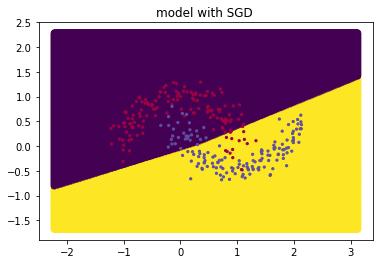

In [20]:
loss_SGD,acc_SGD = SGD_model.fit(train_x,train_y,batch_size=64)

从绘制的决策边界来看你,可以看到效果并不是很好.

### Momentum Model

我们将迭代次数,学习率不做更改.

In [21]:
layers = [5,2,1]
Momentum_model = Model(layers=layers,epochs=10000,alpha=0.0007,print_step=1000,mode="Momentum")

Running Model Momentum ...
[1000/10000] loss:0.7330822301786277 acc train:0.2633333333333333
[2000/10000] loss:0.37559060609644357 acc train:0.8433333333333334
[3000/10000] loss:0.2532673836243322 acc train:0.8666666666666667
[4000/10000] loss:0.28687475805261964 acc train:0.8733333333333333
[5000/10000] loss:0.2878548996764221 acc train:0.8866666666666667
[6000/10000] loss:0.3171256947466804 acc train:0.8866666666666667
[7000/10000] loss:0.2652927812720848 acc train:0.8833333333333333
[8000/10000] loss:0.35642482226582545 acc train:0.8833333333333333
[9000/10000] loss:0.20958624483095956 acc train:0.8833333333333333
[10000/10000] loss:0.27371081065647096 acc train:0.8966666666666666


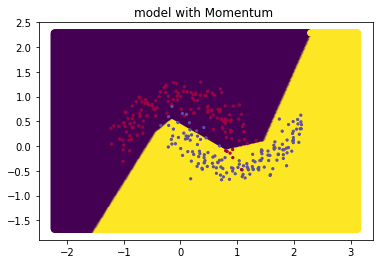

In [22]:
loss_Momentum,acc_Momentum = Momentum_model.fit(train_x,train_y,beta_momentum=0.9)

从决策边界来看,已经比SGD要好处许多了,至少已经有明显的"拐角".

### NAG Model

依然不改变学习率和迭代次数

Running Model NAG ...
[1000/10000] loss:0.7329771396405396 acc train:0.2633333333333333
[2000/10000] loss:0.3755594311552991 acc train:0.8433333333333334
[3000/10000] loss:0.25327031916661624 acc train:0.8666666666666667
[4000/10000] loss:0.2868751610304232 acc train:0.8733333333333333
[5000/10000] loss:0.28785356098591985 acc train:0.8866666666666667
[6000/10000] loss:0.3172601064024472 acc train:0.8866666666666667
[7000/10000] loss:0.26530312682884605 acc train:0.8833333333333333
[8000/10000] loss:0.3563884815186645 acc train:0.8833333333333333
[9000/10000] loss:0.20962655203158775 acc train:0.8833333333333333
[10000/10000] loss:0.2736364617526944 acc train:0.8966666666666666


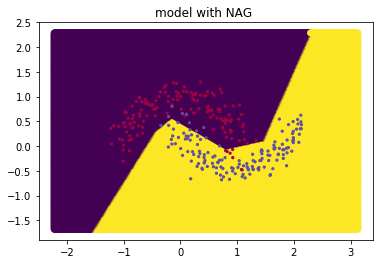

In [23]:
layers = [5,2,1]
NAG_model = Model(layers=layers,epochs=10000,alpha=0.0007,print_step=1000,mode="NAG")
loss_NAG,acc_NAG = NAG_model.fit(train_x,train_y,beta_NAG=0.9)

可以看到效果是和Momentum差不多,但是这可能是因为数据集的问题,理论上NAG应该要比Momentum好一点,但是无论如何也是比SGD要好些.

### Adagrad

由于Adagrad建议使用0.01的学习率,所以这里我们使用```alpha=0.01```.

In [24]:
layers = [5,2,1]
Adagrad_model = Model(layers=layers,epochs=10000,alpha=0.01,print_step=1000,mode="Adagrad")

Running Model Adagrad ...
[1000/10000] loss:0.7127270160879506 acc train:0.3333333333333333
[2000/10000] loss:0.3297200811500052 acc train:0.8566666666666667
[3000/10000] loss:0.1990437114702639 acc train:0.8833333333333333
[4000/10000] loss:0.25165738784703545 acc train:0.89
[5000/10000] loss:0.24898224156662815 acc train:0.89
[6000/10000] loss:0.2824381278681543 acc train:0.89
[7000/10000] loss:0.21337873821156217 acc train:0.8933333333333333
[8000/10000] loss:0.33672943748166945 acc train:0.8933333333333333
[9000/10000] loss:0.1865024024992747 acc train:0.8966666666666666
[10000/10000] loss:0.27055447885584966 acc train:0.9


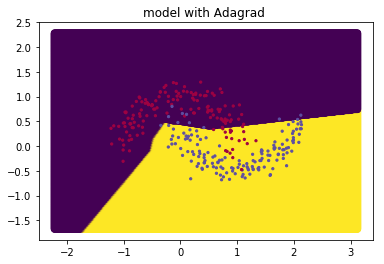

In [25]:
loss_Adagrad,acc_Adagrad = Adagrad_model.fit(train_x,train_y,epsilon=1e-7)

可以看到自适应的学习方式就以训练集最后的正确率而言比NAG好一点的,当然从决策边界来看,整体的训练效果只是一般.

### Adadelta Model

In [37]:
layers = [5,2,1]
Adadelta_model = Model(layers=layers,epochs=10000,print_step=1000,mode="Adadelta")

Running Model Adadelta ...
[1000/10000] loss:0.7242481807483869 acc train:0.29
[2000/10000] loss:0.09769521200726564 acc train:0.9766666666666667
[3000/10000] loss:0.008184710670464864 acc train:0.98
[4000/10000] loss:0.053213997657216204 acc train:0.98
[5000/10000] loss:0.05821350053890533 acc train:0.98
[6000/10000] loss:0.03204732098914241 acc train:0.9833333333333333
[7000/10000] loss:0.08122469463597218 acc train:0.9833333333333333
[8000/10000] loss:0.07758792739551265 acc train:0.9833333333333333
[9000/10000] loss:0.026308261539899548 acc train:0.9833333333333333
[10000/10000] loss:0.04951774141238217 acc train:0.9833333333333333


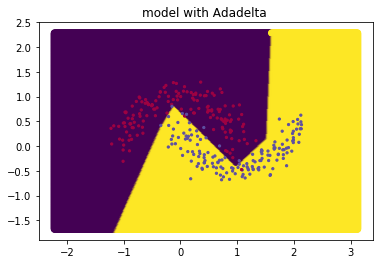

In [38]:
loss_Adadelta,acc_Adadelta = Adadelta_model.fit(data=train_x,labels=train_y,epsilon=1e-6,beta_Adadelta=0.9)

可以看到使用Adadelta后,效果明显有提升,但是就决策边界来看,貌似黄色部分有些过拟合.

### RMSProp Model

In [28]:
layers = [5,2,1]
RMSProp_model = Model(layers=layers,epochs=10000,alpha=0.001,print_step=1000,mode="RMSProp")

Running Model RMSProp ...
[1000/10000] loss:0.7263576040479233 acc train:0.28
[2000/10000] loss:0.26550028793851715 acc train:0.9033333333333333
[3000/10000] loss:0.015222468680846837 acc train:0.9766666666666667
[4000/10000] loss:0.049796575967150855 acc train:0.98
[5000/10000] loss:0.055083539983346266 acc train:0.98
[6000/10000] loss:0.03576074804374705 acc train:0.9866666666666667
[7000/10000] loss:0.08657082408409755 acc train:0.98
[8000/10000] loss:0.08006432463328465 acc train:0.9833333333333333
[9000/10000] loss:0.02498555810613791 acc train:0.9833333333333333
[10000/10000] loss:0.050447839188513074 acc train:0.9833333333333333


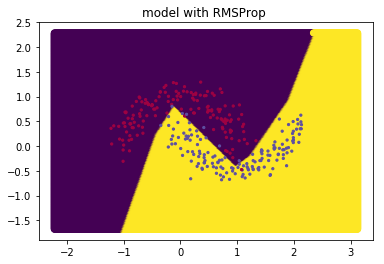

In [29]:
loss_RMSProp,acc_RMSProp = RMSProp_model.fit(data=train_x,labels=train_y,epsilon=1e-6,beta_RMSProp=0.9)

可以看到RMsProp效果又比Adadelta更加好些,且应该减缓了一些过拟合的情况.

最后我们来看看大Boss Adam

### Adam

In [55]:
layers = [5,2,1]
Adam_model = Model(layers=layers,epochs=10000,alpha=0.001,print_step=1000,mode="Adam")

Running Model Adam ...
[1000/10000] loss:0.7304942667503806 acc train:0.26666666666666666
[2000/10000] loss:0.27821913899367035 acc train:0.89
[3000/10000] loss:0.11921677160584923 acc train:0.9433333333333334
[4000/10000] loss:0.04261785052705132 acc train:0.9766666666666667
[5000/10000] loss:0.02335706028607215 acc train:0.9866666666666667
[6000/10000] loss:0.032175234834860914 acc train:0.99
[7000/10000] loss:0.07286577798245801 acc train:0.99
[8000/10000] loss:0.06386623400252557 acc train:0.99
[9000/10000] loss:0.012430689181614418 acc train:0.99
[10000/10000] loss:0.022710433862908587 acc train:0.9933333333333333


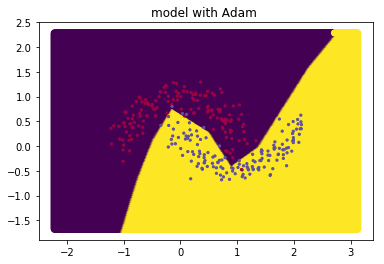

In [56]:
loss_Adam,acc_Adam = Adam_model.fit(train_x,train_y,beta_Adam_1=0.9,beta_Adam_2=0.999,epsilon=1e-8)

可以看到就目前训练集而言,Adam的效果是最好的,无论是从决策边界来看还是训练样本的正确率而言.

### Plot Loss and Correct Rate

最后我们来整体比较下着6个Optimizer的Loss value 以及 accuracy.

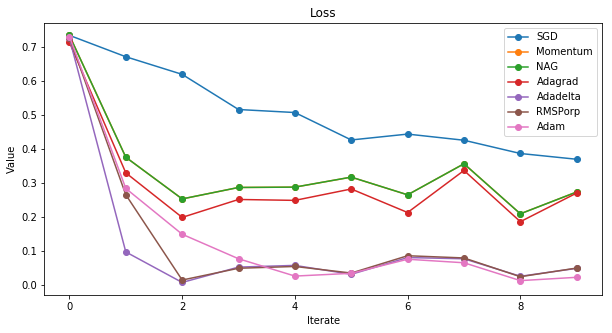

In [50]:
figure = plt.figure(figsize=(10,5))
plt.plot(loss_SGD,'-o',label="SGD")
plt.plot(loss_Momentum,'-o',label="Momentum")
plt.plot(loss_NAG,'-o',label="NAG")
plt.plot(loss_Adagrad,'-o',label="Adagrad")
plt.plot(loss_Adadelta,'-o',label="Adadelta")
plt.plot(loss_RMSProp,'-o',label="RMSProp")
plt.plot(loss_Adam,'-o',label="Adam")
plt.title('Loss')
plt.xlabel('Iterate')
plt.ylabel('Value')
plt.legend()
plt.show()

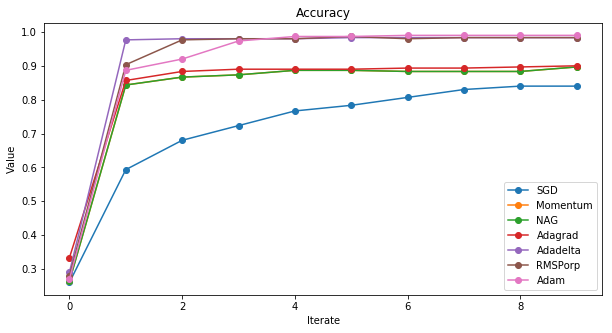

In [53]:
figure = plt.figure(figsize=(10,5))
plt.plot(acc_SGD,'-o',label="SGD")
plt.plot(acc_Momentum,'-o',label="Momentum")
plt.plot(acc_NAG,'-o',label="NAG")
plt.plot(acc_Adagrad,'-o',label="Adagrad")
plt.plot(acc_Adadelta,'-o',label="Adadelta")
plt.plot(acc_RMSProp,'-o',label="RMSProp")
plt.plot(acc_Adam,'-o',label="Adam")
plt.title('Accuracy')
plt.xlabel('Iterate')
plt.ylabel('Value')
plt.legend()
plt.show()

可以看到对于此样本而言:

(1)SGD的效果是最差的

(2) Momentum和NAG的效果一样

(3) Adadelta和RMSProp的效果差不多

(4) Adam的效果最优.

(5) 对于1个print step epoch而言,Adadelta效果比较好,但是最终还是Adam微弱的好一些.

# Summary

对于这7个优化器而言,我们最常使用的是Adam,当然在RNN中,我们使用RMSProp也是比较多的.对于SGD而言,并不意味着SGD一定是不要的,这还是要具体情况具体分析,7个优化器都有自己各自的优势,应该依据不同的情况选择不同的优化器来调整模型.